In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf 
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.16.1


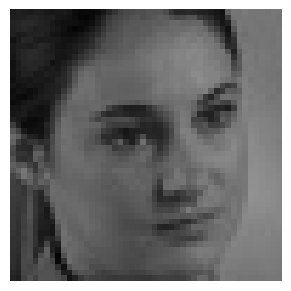

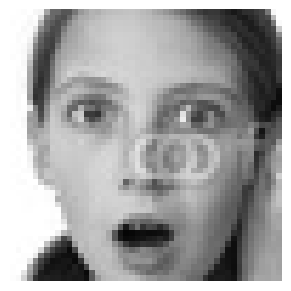

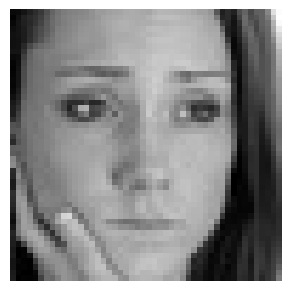

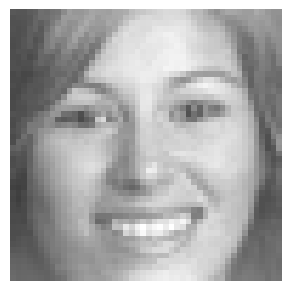

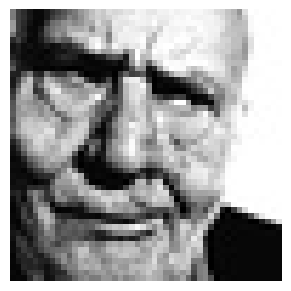

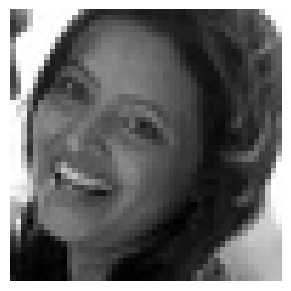

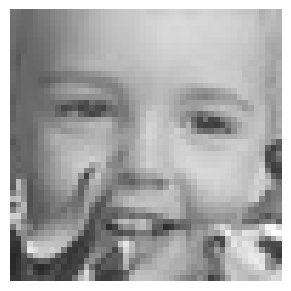

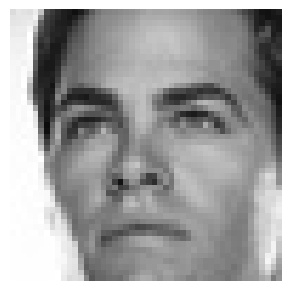

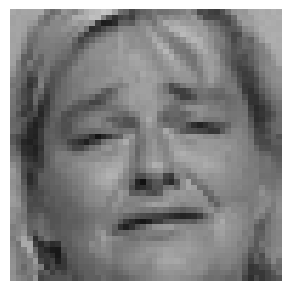

In [11]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [12]:
#preparing data for training 
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),
                                                  color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)

datagen_train=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("test/",target_size=(img_size,img_size),
                                                   color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding='same')(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPool2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x

In [14]:
def dense_f(input_tensor,nodes):
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x
    

In [15]:
# Define the model
def model_fer(input_shape):
    inputs = Input(input_shape)
    
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 128, (5, 5)) 
    conv_3 = Convolution(conv_2, 512, (3, 3))
    conv_4 = Convolution(conv_3, 512, (3, 3))

    flatten = Flatten()(conv_4)
    
    dense_1 = Dense(256)(flatten)
    dense_2 = Dense(512)(dense_1)

    output = Dense(7, activation='softmax')(dense_2)
    model = Model(inputs=[inputs], outputs=[output])

    opt=Adam(learning_rate=0.0005)

    model.compile(loss=['categorical_crossentropy'], optimizer=opt, metrics=['accuracy'])

    return model


In [16]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,90

 Total params: 4,475,655 (17.07 MB)

 Trainable params: 4,473,223 (17.06 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [1]:
#visualizing the model 
epochs=15
steps_per_epochs=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint('model_.weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001)
callbacks=[checkpoint,reduce_lr]

NameError: name 'train_generator' is not defined

Model Training

In [19]:
history=model.fit(
x=train_generator,
steps_per_epoch=steps_per_epochs,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_steps,
callbacks=callbacks)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.2259 - loss: 3.4346
Epoch 1: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 201s 445ms/step - accuracy: 0.2260 - loss: 3.4319 - val_accuracy: 0.2419 - val_loss: 1.8283 - learning_rate: 5.0000e-04
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:16 440ms/step - accuracy: 0.3906 - loss: 1.6961
Epoch 2: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.3906 - loss: 0.8499 - val_accuracy: 0.2000 - val_loss: 0.8647 - learning_rate: 5.0000e-04
Epoch 3/15


2024-03-17 11:30:42.659169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-17 11:30:42.686322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.3908 - loss: 1.5666
Epoch 3: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 204s 455ms/step - accuracy: 0.3908 - loss: 1.5664 - val_accuracy: 0.4357 - val_loss: 1.4374 - learning_rate: 5.0000e-04
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:21 451ms/step - accuracy: 0.3438 - loss: 1.7350
Epoch 4: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.3438 - loss: 0.8694 - val_accuracy: 0.3000 - val_loss: 0.9197 - learning_rate: 5.0000e-04
Epoch 5/15


2024-03-17 11:34:07.281178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:34:07.302453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.4842 - loss: 1.3524
Epoch 5: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 204s 456ms/step - accuracy: 0.4842 - loss: 1.3524 - val_accuracy: 0.5162 - val_loss: 1.2686 - learning_rate: 5.0000e-05
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:22 453ms/step - accuracy: 0.5469 - loss: 1.2087
Epoch 6: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.5469 - loss: 0.6057 - val_accuracy: 0.5000 - val_loss: 0.6211 - learning_rate: 5.0000e-05
Epoch 7/15


2024-03-17 11:37:32.200789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:37:32.221443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.5106 - loss: 1.2836
Epoch 7: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 202s 451ms/step - accuracy: 0.5106 - loss: 1.2836 - val_accuracy: 0.5135 - val_loss: 1.2657 - learning_rate: 5.0000e-05
Epoch 8/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:27 464ms/step - accuracy: 0.5938 - loss: 1.2722
Epoch 8: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 253us/step - accuracy: 0.5938 - loss: 0.6375 - val_accuracy: 0.5000 - val_loss: 0.7113 - learning_rate: 5.0000e-05
Epoch 9/15


2024-03-17 11:40:54.814928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:40:54.833897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5272 - loss: 1.2490
Epoch 9: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 201s 449ms/step - accuracy: 0.5272 - loss: 1.2490 - val_accuracy: 0.5276 - val_loss: 1.2467 - learning_rate: 1.0000e-05
Epoch 10/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:19 447ms/step - accuracy: 0.5469 - loss: 1.1267
Epoch 10: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 244us/step - accuracy: 0.5469 - loss: 0.5646 - val_accuracy: 0.2000 - val_loss: 1.1689 - learning_rate: 1.0000e-05
Epoch 11/15


2024-03-17 11:44:16.692166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:44:16.709740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5257 - loss: 1.2519
Epoch 11: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 202s 450ms/step - accuracy: 0.5258 - loss: 1.2519 - val_accuracy: 0.5329 - val_loss: 1.2355 - learning_rate: 1.0000e-05
Epoch 12/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:19 447ms/step - accuracy: 0.6094 - loss: 1.0711
Epoch 12: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.6094 - loss: 0.5367 - val_accuracy: 0.6000 - val_loss: 0.3963 - learning_rate: 1.0000e-05
Epoch 13/15


2024-03-17 11:47:38.893242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:47:38.913852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.5256 - loss: 1.2447
Epoch 13: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 203s 452ms/step - accuracy: 0.5256 - loss: 1.2447 - val_accuracy: 0.5350 - val_loss: 1.2266 - learning_rate: 1.0000e-05
Epoch 14/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:11 429ms/step - accuracy: 0.4844 - loss: 1.2822
Epoch 14: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step - accuracy: 0.4844 - loss: 0.6425 - val_accuracy: 0.7000 - val_loss: 0.5371 - learning_rate: 1.0000e-05
Epoch 15/15


2024-03-17 11:51:02.150547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-17 11:51:02.168517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.5345 - loss: 1.2270
Epoch 15: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 199s 445ms/step - accuracy: 0.5345 - loss: 1.2270 - val_accuracy: 0.5451 - val_loss: 1.2158 - learning_rate: 1.0000e-05


In [20]:
#model evaluation
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.5346 - loss: 1.2306


[1.213389277458191, 0.5448592901229858]

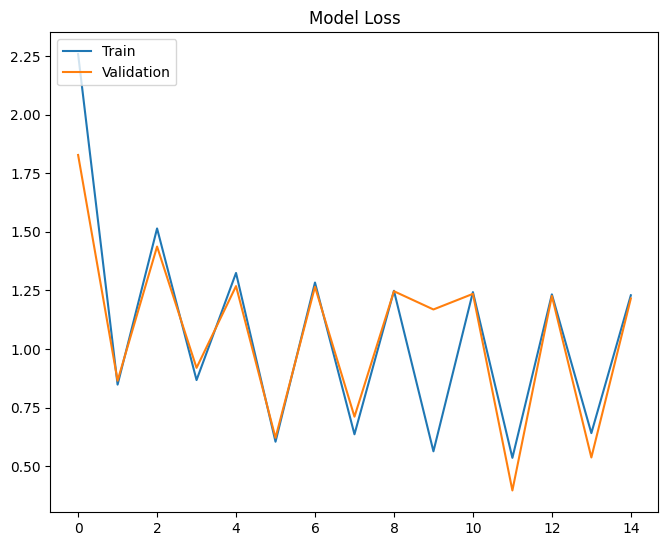

In [21]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)


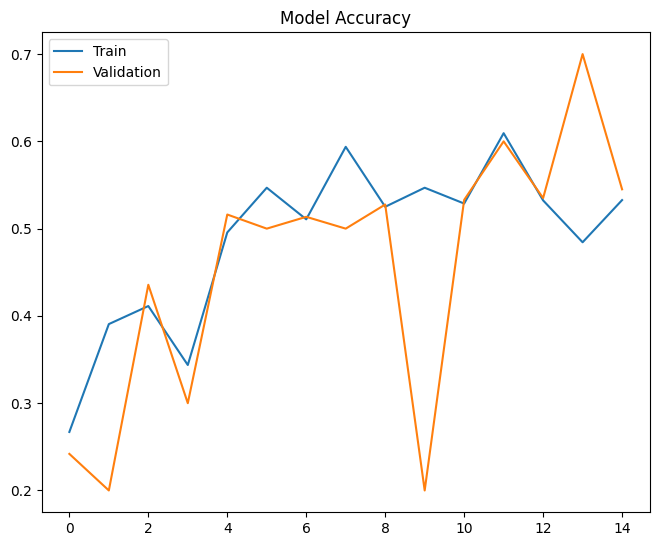

In [22]:
#Plotting model Accuracy
# Plotting loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')  # Corrected legend location
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)


In [23]:
#saving model 
model_json=model.to_json()
with open("model_c.json","w") as json_file:
    json_file.write(model_json)